<a href="https://colab.research.google.com/github/krishna13052001/cnnworks/blob/main/imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.__version__

'2.5.0'

In [3]:
tf.__version__

'2.5.0'

In [4]:
data = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = data.load_data()

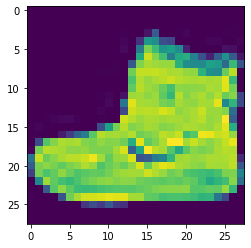

In [5]:
plt.imshow(X_train_full[0])

images are 28x28 grey scale values

In [6]:
y_train_full[0]

9

In [7]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

<h1>Data Normalization</h1>

In [8]:
 # pixel intenstist is 0 to 255 so we will divide every thing by 225
 X_train_n = X_train_full / 255.0
 X_test_n = X_test_full / 255.0

In [9]:
X_validation , X_train  = X_train_n[:5000], X_train_n[5000:]
y_validation, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
np.random.seed(1)
tf.random.set_seed(1)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


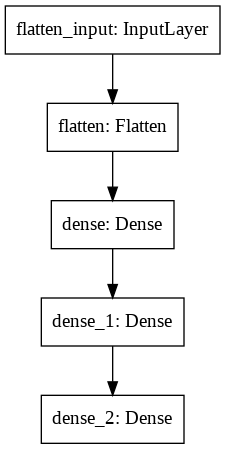

In [13]:
import pydot
keras.utils.plot_model(model)

In [14]:
weights, biases = model.layers[1].get_weights()

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [18]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7149 - accuracy: 0.7641 - val_loss: 0.5320 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4899 - accuracy: 0.8295 - val_loss: 0.4407 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4452 - accuracy: 0.8449 - val_loss: 0.4198 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4180 - accuracy: 0.8547 - val_loss: 0.3954 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3996 - accuracy: 0.8591 - val_loss: 0.3873 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3831 - accuracy: 0.8651 - val_loss: 0.3718 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3694 - accuracy: 0.8681 - val_loss: 0.3858 - val_accuracy:

In [19]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [20]:
model_history.history

{'accuracy': [0.764054536819458,
  0.8295090794563293,
  0.8448908925056458,
  0.8546727299690247,
  0.8590909242630005,
  0.8650727272033691,
  0.8680545687675476,
  0.8726909160614014,
  0.876872718334198,
  0.8806909322738647,
  0.8843454718589783,
  0.885309100151062,
  0.8884363770484924,
  0.8904545307159424,
  0.8928727507591248,
  0.8941636085510254,
  0.8965272903442383,
  0.8978182077407837,
  0.9010545611381531,
  0.9030181765556335,
  0.9037091135978699,
  0.906109094619751,
  0.9078181982040405,
  0.9092181921005249,
  0.9108363389968872,
  0.913381814956665,
  0.9134727120399475,
  0.9147999882698059,
  0.916527271270752,
  0.9172182083129883],
 'loss': [0.7148920297622681,
  0.4898756742477417,
  0.4451940357685089,
  0.4180085361003876,
  0.3996325731277466,
  0.383132666349411,
  0.3693520724773407,
  0.356209397315979,
  0.34552592039108276,
  0.33601927757263184,
  0.32748764753341675,
  0.31850382685661316,
  0.31140658259391785,
  0.30519261956214905,
  0.298589229

In [22]:
model.evaluate(X_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 73.7839 - accuracy: 0.8371


[73.78392791748047, 0.8371000289916992]